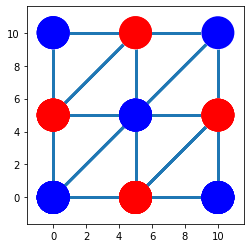

In [3]:
from IPython import display
import time
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import random
import copy
import pdb

def plot_configuration(state, fig):
    plt.axes()
    line1 = plt.Line2D((0, 10), (0, 0), lw=2.5,zorder=1)
    plt.gca().add_line(line1)
    line2 = plt.Line2D((0,10), (5, 5), lw=2.5,zorder=1)
    plt.gca().add_line(line2)
    line3 = plt.Line2D((0,10), (10, 10), lw=2.5,zorder=1)
    plt.gca().add_line(line3)

    lineA = plt.Line2D((0, 0), (0, 10), lw=2.5,zorder=1)
    plt.gca().add_line(lineA)
    
    lineB = plt.Line2D((5,5), (0, 10), lw=2.5,zorder=1)
    plt.gca().add_line(lineB)
    lineC = plt.Line2D((10,10), (0, 10), lw=2.5,zorder=1)
    plt.gca().add_line(lineC)

    lineA1 = plt.Line2D((0, 10), (0, 10), lw=2.5,zorder=1)
    plt.gca().add_line(lineA1)
    lineB2 = plt.Line2D((0,5), (5, 10), lw=2.5,zorder=1)
    plt.gca().add_line(lineB2)
    lineC3 = plt.Line2D((5,10), (0, 5), lw=2.5,zorder=1)
    plt.gca().add_line(lineC3)


    circle_1_1 = plt.Circle((0, 0), radius=1, fc=state[0],zorder=2)
    plt.gca().add_patch(circle_1_1)
    circle_1_2 = plt.Circle((0, 5), radius=1, fc=state[3],zorder=2)
    plt.gca().add_patch(circle_1_2)
    circle_1_3 = plt.Circle((0, 10), radius=1, fc=state[6],zorder=2)
    plt.gca().add_patch(circle_1_3)

    circle_2_1 = plt.Circle((5, 0), radius=1, fc=state[1],zorder=2)
    plt.gca().add_patch(circle_2_1)
    circle_2_2 = plt.Circle((5, 5), radius=1, fc=state[4],zorder=2)
    plt.gca().add_patch(circle_2_2)
    circle_2_3 = plt.Circle((5, 10), radius=1, fc=state[7],zorder=2)
    plt.gca().add_patch(circle_2_3)

    circle_3_1 = plt.Circle((10, 0), radius=1, fc=state[2],zorder=2)
    plt.gca().add_patch(circle_3_1)
    circle_3_2 = plt.Circle((10, 5), radius=1, fc=state[5],zorder=2)
    plt.gca().add_patch(circle_3_2)
    circle_3_3 = plt.Circle((10, 10), radius=1, fc=state[8],zorder=2)
    plt.gca().add_patch(circle_3_3)

    plt.axis('scaled')
    fig.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)

plt.ion()
fig,ax = plt.subplots(1,1)
state=['w','w','w','w','w','w','w','w','w']
domain = ['r','g','b']

def test():
    for i in range(10):
        #print(i)
        plot_configuration(state, fig)
        if i==9:
           break 
        if i % 2 == 0:
            state[i] = 'b'
        else:
            state[i] = "r"
        time.sleep(0.2)
test() 

In [4]:
def checkConstraint(state):
    if state[0] == state[1] and state[0] != "w":
        return False
    if state[0] == state[3] and state[0] != "w":
        return False
    if state[0] == state[4] and state[0] != "w":
        return False
    if state[1] == state[4] and state[1] != "w":
        return False
    if state[1] == state[5] and state[1] != "w":
        return False
    if state[1] == state[2] and state[1] != "w":
        return False
    if state[0] == state[1] and state[0] != "w":
        return False
    if state[2] == state[5] and state[2] != "w":
        return False
    if state[3] == state[4] and state[3] != "w":
        return False
    if state[3] == state[6] and state[3] != "w":
        return False
    if state[3] == state[7] and state[3] != "w":
        return False
    if state[4] == state[5] and state[4] != "w":
        return False
    if state[4] == state[7] and state[4] != "w":
        return False
    if state[4] == state[8] and state[4] != "w":
        return False
    if state[5] == state[8] and state[5] != "w":
        return False
    if state[6] == state[7] and state[6] != "w":
        return False
    if state[7] == state[8] and state[7] != "w":
        return False
    return True

In [11]:
def depthFirstSearch(state, domain, constraints, fig):
    global nbExecutions
    nbExecutions = nbExecutions + 1
    
    # Goal test: abort recursion when the last state has an assigned value
    # and all constraints are satisfied
    if state[len(state)-1] != 'w':
        plot_configuration(state, fig)
        if constraints(state) == True:
            return state, True
        else:
            return state, False
    
    # go through all variables until we find an unassigned one
    for i in range(len(state)):
        if state[i] == 'w': # we found an unassigned variable
            # go through the domain values and try assigning the variable with a value
            for r in range(len(domain)):
                state[i] = domain[r]
                if constraints(state) == False:
                    continue
                plot_configuration(state, fig)
                time.sleep(1.2)
                
                # recursion step -> going deeper in the search tree
                temp_state, success = depthFirstSearch(state, domain, constraints, fig)
                if success:
                    return temp_state, success
                
            # Backtracking: we tried all values for the chosen variable, but all failed -> backtrack
            state[i] = 'w'
            return state, False
    return state, False #we should never reach this statement and return beforehand

Number of executions: 15


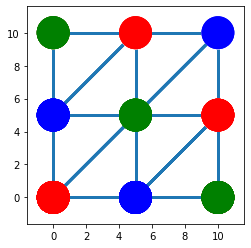

In [12]:
plt.ion()
fig,ax = plt.subplots(1,1)
# Define the constraint satisfaction problem
state=['w','w','w','w','w','w','w','w','w']
domain = ["r","b","g"]
constraints = checkConstraint   
nbExecutions = 0
solution, finalResult = depthFirstSearch(state, domain, constraints, fig)
print("Number of executions: " + str(nbExecutions))

## Improve Visualization
Show the remaining values for each variable

In [13]:
def plot_configuration_withDomainValues(state, domains, constraints, fig, nbColumns=3):
    plt.axes()
    if len(state)>len(domains):
        print(state)
        print(domains)
        pdb.set_trace()
    #draw circles
    for i in range(len(state)):
        x, y = returnCoordinatesForIndex(len(state),i,nbColumns)
        #circumvent bug in plt: old circles stay there, so we taint them in the color of the underlying circle
        for r in range(1,3):
            generic_circle = plt.Circle((x-1+r, y), radius=0.3, fc=state[i],zorder=3, linewidth=0)
            plt.gca().add_patch(generic_circle)    
        for r in range(len(domains[i])):
            generic_circle = plt.Circle((x-1+r, y), radius=0.25, fc=domains[i][r],zorder=3)
            plt.gca().add_patch(generic_circle)
        
        generic_circle = plt.Circle((x, y), radius=1.5, fc=state[i],zorder=2)
        plt.gca().add_patch(generic_circle)
        
    #draw constraints
    temp_state = ["w"] * len(state)
    for i in range(len(state)-1):
        temp_state[i] = "r"
        for k in range(i+1,len(state)):
            temp_state[k] = "r"
            if constraints(temp_state) == False:
                x1,y1 = returnCoordinatesForIndex(len(state),i,nbColumns)
                x2,y2 = returnCoordinatesForIndex(len(state),k,nbColumns)
                generic_line = plt.Line2D((x1,x2),(y1,y2),lw=2.5,zorder=1)
                plt.gca().add_line(generic_line)
            temp_state[k] = "w"
        temp_state[i] = "w"
    plt.axis('scaled')
    fig.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)

def returnCoordinatesForIndex(nbCirles, currentVariable, nbColumns):
    '''
    The graph draws a node (variable) in steps of 5 in x and y direction. So, when
    we have nodes at (0,0), (0,5), (0,10), (5, 0), etc. This function returns the coordinates
    for the given variable / node.
    '''
    y = -5
    x = -5
    for k in range(nbCirles):
        if k % nbColumns == 0:
            y = y + 5 # we need to go 'higher' in the graph 
            x = 0 # and start at the fron again
        if currentVariable == k:
            return x, y
        x = x + 5 #move to the right
    return 0, 0 #should not happen


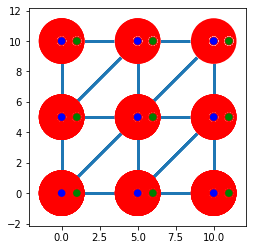

In [15]:
state=['w','w','w','w','w','w','w','w','w']
domain = ["r","b","g"]
domains = [copy.deepcopy(domain) for i in range(len(state))]
def test_with_values():
    for i in range(10):
        #print(i)
        plot_configuration_withDomainValues(state, domains, constraints, fig)
        if i==9:
           break 
        state[i] = "r"
        time.sleep(0.2)

test_with_values()

In [26]:
def solveCSP(state, domains, constraints, position, fig):
    ''' Recursive function to solve a CSP:
    CSP formalization: 
    variables = state vector (list here), 
    domains = list of lists representing vector of domains for all variables, 
    constraints = implizit constraints encoded as a function,
    position = current variable that needs assignment,
    fig = only for visualization purpose to visualize the current state of solving the CSP
    '''
    global nbExecutions
    nbExecutions = nbExecutions + 1 #counting the number of executions
    
    # goal test:  abort recursion when the last state has an assigned value 
    #and all constraints are satisfied
    if state[len(state)-1] != "w": 
        if constraints(state) == True: 
            plot_configuration_withDomainValues(state, domains, constraints, fig)
            return state, True #found valid solution
        else:
            plot_configuration_withDomainValues(state, domains, constraints, fig)
            return state, False #backtracking...
        
    if state[position] == "w" and len(domains[position]) > 0:
        #go through all values in a domain for the current variable
        for value in domains[position]:
            temp_state = copy.deepcopy(state) #copy current solution
            temp_domains = copy.deepcopy(domains) #copy current domain setting
            temp_state[position] = value #select the chosen value
            
            if constraints(temp_state) == False:
                continue #value is in conflict, try next value
            temp_domains[position] = [value]
            
            # Forward checking
            failedForward = False
            #get Neighbors of the CSP Graph to check for possible conflicts in future
            neighbors = getNeighbors(position, constraints)
            for neighbor in neighbors:
                # we check here, when there is only one value left in the domain of the
                # neighbor and it has the same color as our current value, then there will
                # be a conflict in future, so the value is incorrect
                if (len(temp_domains[neighbor])) == 1 and value in temp_domains[neighbor]:
                    failedForward = True
                    break
            if failedForward:
                continue #forward checking resulted in conflict, so try next value
                
            # there is no conflict, but we need to remove the value that we have chosen from
            # our neighbors since they are now invalid to take
            for neighbor in neighbors:
                if value in temp_domains[neighbor]:
                    temp_domains[neighbor].remove(value)
                    
            #plotting
            plot_configuration_withDomainValues(temp_state, temp_domains, constraints, fig)
            time.sleep(1.5)
            
            #Depth-first search using the recursive function call (set position + 1)
            temp_state, success = solveCSP(temp_state, temp_domains, constraints, position+1,fig)
            if success:
                return temp_state, True
        return state, False
    else:
        return state, False

def getNeighbors(position, constraints, optimize=True):
    ''' Function that returns all neighbors of our current variable (position)
    Idea: colorize our current variable with red. Now go through all all others variables
    Test whether setting the variable to the same color results in a conflict. 
    If so, it is a neighbor and we append it to the list of neighbors
    '''
    temp_state = state=['w','w','w','w','w','w','w','w','w']
    neighbors = list()
    temp_state[position] = "r"
    # we start at position+1 instead of 0, because we already made sure that the constraints
    # to previous variables have been addressed. This is just an optimization!
    start = 0
    if optimize:
        start = position+1
    for k in range(start, len(state)): 
        temp_state[k] = "r"
        if(constraints(temp_state)) == False:
            neighbors.append(k)
        if (optimize != False or k != position): #if optimize is false, we must not reset the target position
            temp_state[k] = "w"
    return neighbors

In [18]:
def test_getNeighbors():
    position = 0
    true_neighbors = [1,3,4]
    neighbors = getNeighbors(position, constraints)
    if (set(true_neighbors) == set(neighbors)):
        print("first test okay")
    else:
        print("returned wrong list of neighbors for first test.")
        print("True list " + str(true_neighbors) + " vs. returned list " + str(neighbors))
        
    #Fails because of the optimization
    position = 1
    true_neighbors = [0,2,4,5]
    neighbors = getNeighbors(position, constraints, optimize=False)
    if (set(true_neighbors) == set(neighbors)):
        print("second test okay")
    else:
        print("returned wrong list of neighbors second test.")
        print("True list " + str(true_neighbors) + " vs. returned list " + str(neighbors))
test_getNeighbors()

first test okay
second test okay


12


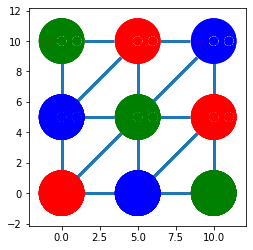

In [27]:
plt.ion()
fig,ax = plt.subplots(1,1)
nbExecutions = 0

#Define CSP
state=['w','w','w','w','w','w','w','w','w']
domain = ["r","b","g"]
domains = [copy.deepcopy(domain) for i in range(len(state))]
constraints = checkConstraint    

#Solve CSP
solution, finalResult = solveCSP(state, domains, constraints, 0,fig)
print(nbExecutions)